In [59]:
import sys
sys.path.append('..')  # Add the parent folder to the import path
import torch
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from utils import set_split

In [13]:
graph = torch.load('../../processed_data/heterogeneous_graph_768_no_med_balanced_with_prompt.pt')
train_indices, val_indices, test_indices, train_labels, val_labels, test_labels, weights = \
        set_split(graph['user'].y, balanced_test=False, test_val_size=0.8)

In [42]:
RGCN_embeddings = np.load('../embeddings/RGCN_embeddings.npy')
GCN_embeddings = np.load('../embeddings/GCN_embeddings.npy')
SeHGNN_embeddings = np.load('../embeddings/SeHGNN_embeddings.npy')
full_embeddings = np.load('../embeddings/full_embeddings.npy')
food_embeddings = np.load('../embeddings/food_embeddings.npy')
habit_embeddings = np.load('../embeddings/habit_embeddings.npy')

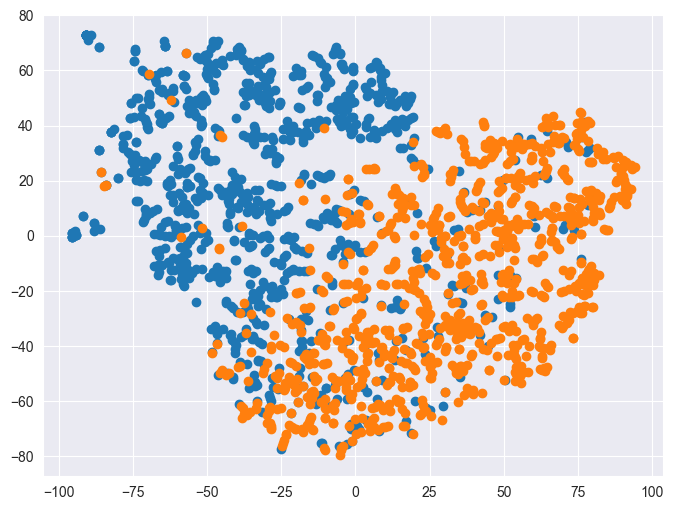

In [61]:
# Apply PCA to reduce to two dimensions
tsne = TSNE(n_components=2, perplexity=10, learning_rate=200, n_iter=1000, random_state=42)
embeddings_2d = tsne.fit_transform(full_embeddings)

# Create a DataFrame for easier plotting
df = pd.DataFrame(embeddings_2d, columns=['PC1', 'PC2'])
df['label'] = test_labels  # Assuming test_truth holds the labels

# Plot
plt.figure(figsize=(8, 6))
for label in np.unique(test_labels):
    indices = df['label'] == label
    plt.scatter(df.loc[indices, 'PC1'], df.loc[indices, 'PC2'], label=label)
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

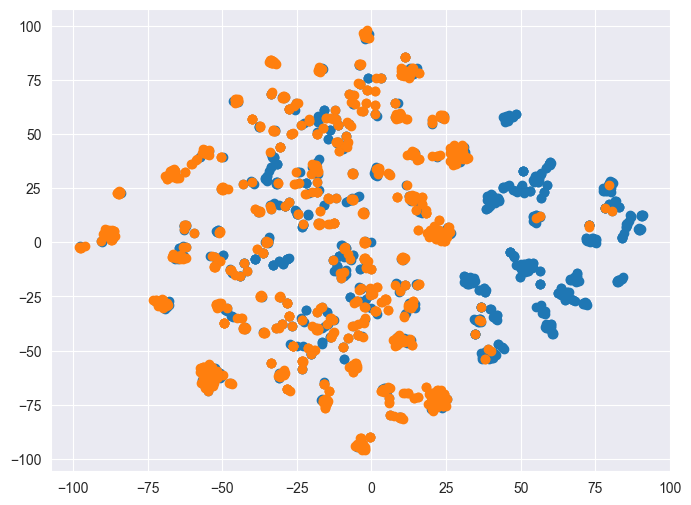

In [68]:
# Apply PCA to reduce to two dimensions
tsne = TSNE(n_components=2, perplexity=10, learning_rate=200, n_iter=1000, random_state=42)
embeddings_2d = tsne.fit_transform(SeHGNN_embeddings)

# Create a DataFrame for easier plotting
df = pd.DataFrame(embeddings_2d, columns=['PC1', 'PC2'])
df['label'] = test_labels  # Assuming test_truth holds the labels

# Plot
plt.figure(figsize=(8, 6))
for label in np.unique(test_labels):
    indices = df['label'] == label
    plt.scatter(df.loc[indices, 'PC1'], df.loc[indices, 'PC2'], label=label)
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load embeddings
RGCN_embeddings = np.load('./embeddings/RGCN_embeddings.npy')
GCN_embeddings = np.load('./embeddings/GCN_embeddings.npy')
SeHGNN_embeddings = np.load('./embeddings/SeHGNN_embeddings.npy')
HR_GNN_embeddings = np.load('./embeddings/full_embeddings.npy')

In [72]:
graph = torch.load('../processed_data/heterogeneous_graph_768_no_med_balanced_with_prompt.pt')
train_indices, val_indices, test_indices, train_labels, val_labels, test_labels, weights = \
        set_split(graph['user'].y, balanced_test=False, test_val_size=0.8)

In [79]:

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=20, learning_rate=200, n_iter=1000)
RGCN_tsne = tsne.fit_transform(RGCN_embeddings)
GCN_tsne = tsne.fit_transform(GCN_embeddings)
SeHGNN_tsne = tsne.fit_transform(SeHGNN_embeddings)
HR_GNN_tsne = tsne.fit_transform(HR_GNN_embeddings)

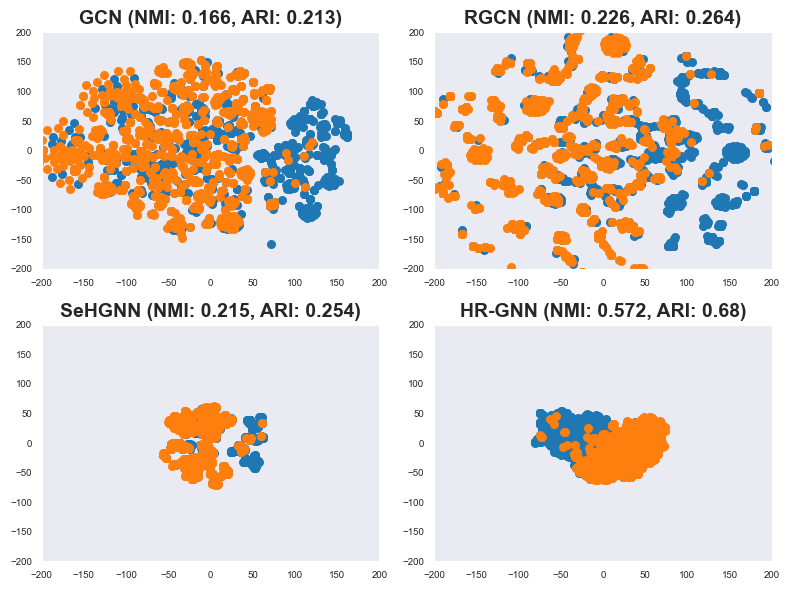

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# ... [loading your embeddings and test_labels] ...

# NMI and ARI scores
scores = {
    "GCN": {"NMI": 0.166, "ARI": 0.213},
    "RGCN": {"NMI": 0.226, "ARI": 0.264},
    "SeHGNN": {"NMI": 0.215, "ARI": 0.254},
    "HR-GNN": {"NMI": 0.572, "ARI": 0.680}
}

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(8, 6), facecolor='white')
models = [("GCN", GCN_tsne), ("RGCN", RGCN_tsne), ("SeHGNN", SeHGNN_tsne), ("HR-GNN", HR_GNN_tsne)]

for ax, (model_name, embeddings) in zip(axs.flatten(), models):
    for label in np.unique(test_labels):
        indices = test_labels == label
        ax.scatter(embeddings[indices, 0], embeddings[indices, 1], label=label, s=30)  # Reduced point size
    ax.set_title(f'{model_name} (NMI: {scores[model_name]["NMI"]}, ARI: {scores[model_name]["ARI"]})',
                 fontsize=14, fontweight='bold')  # Bold and larger title
    ax.set_xlabel('')
    ax.set_ylabel('')
    #ax.set_facecolor('white')  # Set the background color to white
    ax.grid(False)  # Turn off the grid
    ax.set_ylim(-200, 200)  # Adjust as necessary
    ax.set_xlim(-200, 200)  # Adjust as necessary
    ax.tick_params(axis='both', which='major', labelsize=7)  # Adjust font size of the ticks

plt.tight_layout()
plt.show()


